In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)

In [5]:
np.mean(x)

4.8587792760014565

In [3]:
np.mean(y)

14.80142786070299

In [7]:
def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
rss

81.540007425512

Estimate for the slope:  2.003999999993347


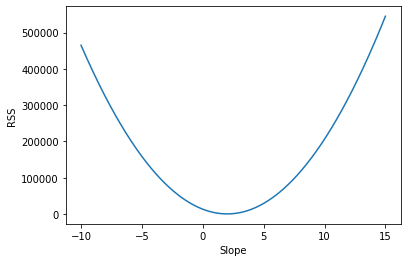

In [16]:
rss = [] 
slopes = np.arange(-10,15,0.001)
for slope in slopes: 
    rss.append(np.sum((y - beta_0 - slope * x)**2))
    
ind_min = np.argmin(rss)
print("Estimate for the slope: ", slopes[ind_min])

# Plot figure
plt.figure()
plt.plot(slopes,rss)
plt.xlabel("Slope")
plt.ylabel("RSS");

In [17]:
import statsmodels.api as sm
mod = sm.OLS(y, x)
est = mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):                    1.14e-75
Time:                        13:37:00   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
X = sm.add_constant(x)
mod = sm.OLS(y,X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):           7.47e-82
Time:                        13:38:47   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

In [28]:
x_1 = [1,2]
x_2 = [3,4]
x1 = np.array(x_1)
x2 = np.array(x_2)
X = np.stack([x1,x2], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)
